# SetUP

In [1]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/publicdata/eccDNA/")

In [2]:
suppressPackageStartupMessages({
library(dplyr)
library(tidyverse)
library(data.table)
library(ggplot2)
#library(edgeR)
#library(RColorBrewer)
library(GenomicRanges)
library(ggsci)
#library(ComplexHeatmap)
#library(Signac)
#library(rtracklayer)
#library(igraph)
})

# LoadData

In [3]:
Ls <- list.files("./",pattern="tsv.bed$")

In [4]:
Dat <- lapply(1:length(Ls),function(idx){
    read.table(Ls[idx]) %>% mutate(dis=V3-V2,Tissue=gsub(".tsv.bed","",Ls[idx]))
})

In [5]:
plotDF <- do.call(rbind,Dat)%>% 
group_by(Tissue) %>% 
summarise(V1,V2,V3,dis,N=n()) %>% filter(N>=400)

`summarise()` has grouped output by 'Tissue'. You can override using the
`.groups` argument.


In [6]:
plotDF$Tissue %>% unique()

[1] "Brain"     "Breast"    "Esophagus" "Lung"      "Muscle"    "Plasma"   
[7] "Skin"      "Stomach"

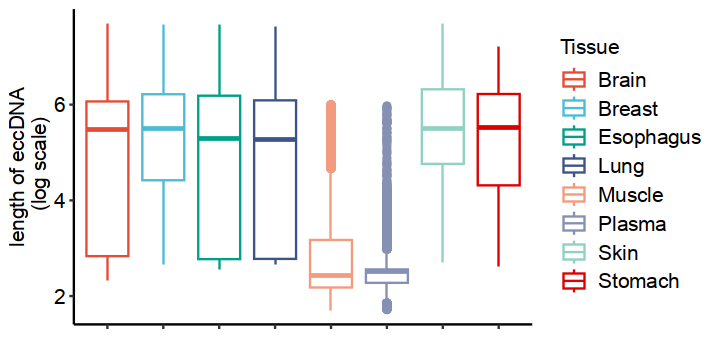

In [10]:
options(repr.plot.width=6,repr.plot.height=3)
ggplot(plotDF, aes(x=Tissue, y=log10(dis+1),color=Tissue)) + 
  geom_boxplot()+
xlab("")+
ylab("length of eccDNA\n (log scale)")+
scale_color_npg()+
theme_classic() +
theme(axis.text.x = element_blank(),axis.title.y = element_text(color="black", size=12),
      legend.title = element_text(color="black", size=12),
      legend.text = element_text(color="black", size=12),
      axis.text.y = element_text(color="black", size=12)
      )
ggsave("../../FINAL_figures/fig4/eccDNA_length_boxplot.pdf",width=4,height=2)

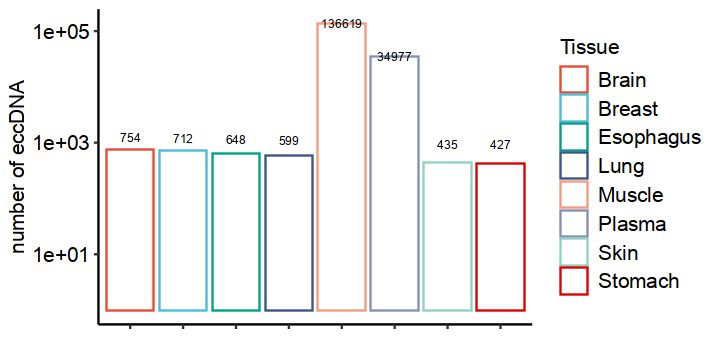

In [31]:
options(repr.plot.width=6,repr.plot.height=3)
ggplot(plotDF %>% select(Tissue,N) %>% distinct(), aes(x=Tissue,y=N)) + 
  geom_bar(aes(color=Tissue),fill=NA,stat="identity")+
  geom_text(aes(label = N, y = N + 500),size=2.5)  +
xlab("")+
ylab("number of eccDNA")+
scale_color_npg()+
scale_y_log10() +
theme_classic() +
theme(axis.text.x = element_blank(),axis.title.y = element_text(color="black", size=12),
      legend.title = element_text(color="black", size=12),
      legend.text = element_text(color="black", size=12),
      axis.text.y = element_text(color="black", size=12)
      )
ggsave("../../FINAL_figures/fig4/eccDNA_number_barplot.pdf",width=4,height=2)

Warning message:
“Removed 6436 rows containing non-finite values (`stat_ecdf()`).”


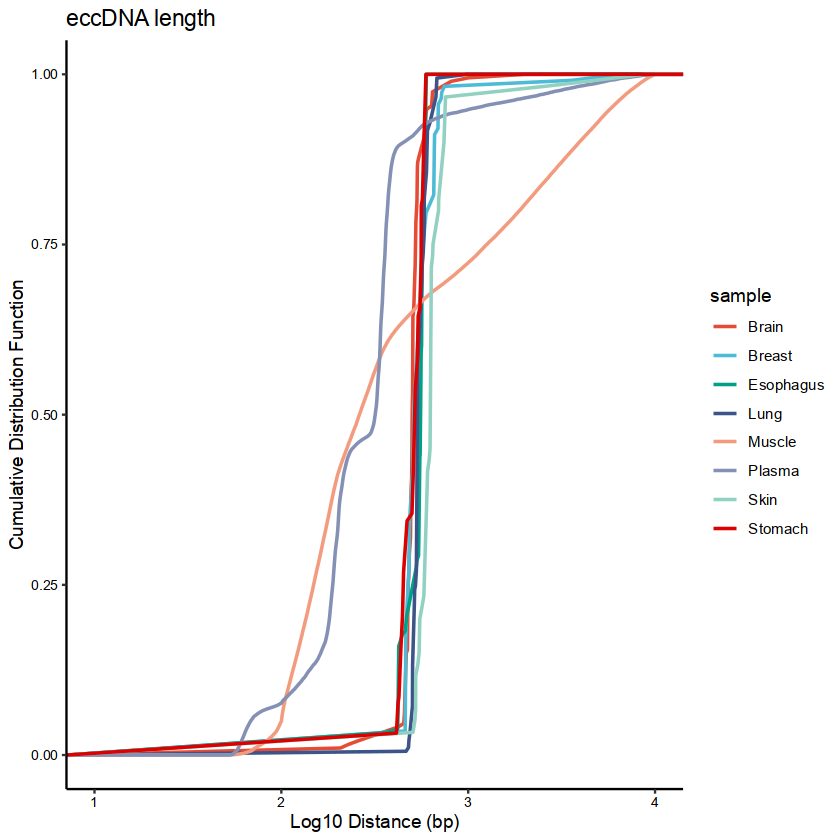

In [140]:
ggplot(plotDF, aes(log10(dis+1))) + stat_ecdf(aes(colour = sample),geom = "line",size=0.75)+
  scale_color_npg()+
  scale_x_continuous(limits = c(1,4))+
  #scale_y_continuous(limits = c(0.01,1))+
  labs(x="Log10 Distance (bp)", y="Cumulative Distribution Function",title="eccDNA length")+
  theme_classic()+
theme(axis.text.x = element_text(color="black", size=8),axis.text.y = element_text(color="black", size=8))
#ggsave("./pic/RYBPdeplete72h.interCTCFLoopAnchor.CDF.pdf",height = 2.8,width=3.3)